# Lesson 5: Generating and Encoding Text with Transformers

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jonathandinu/programming-generative-ai/blob/main/notebooks/05-generating-text-transformers.ipynb) [![GitHub Repo stars](https://img.shields.io/github/stars/jonathandinu/programming-generative-ai?style=social)](https://github.com/jonathandinu/programming-generative-ai)

> Colab for interactive execution in your browser (no setup) and repository for notebook index and additional resources (slides, etc.)

In [1]:
# install dependencies for cloud notebook environments, i.e. Google Colab
%pip install -U transformers sentence-transformers datasets

In [2]:
import torch
from pprint import pprint

# default device boilerplate
device = (
    "cuda" # Device for NVIDIA or AMD GPUs
    if torch.cuda.is_available()
    else "mps" # Device for Apple Silicon (Metal Performance Shaders)
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


## 5.3 Generating Text with Transformers Pipelines

In [3]:
from transformers import pipeline,  set_seed

generator = pipeline(task="text-generation")
set_seed(666)

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


In [4]:
generator.tokenizer

GPT2TokenizerFast(name_or_path='openai-community/gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}
)

In [5]:
generator.model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [6]:
generator("Jonathan")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Jonathan: Right, he's doing that as well as he should.\n\nTaken, that seems like a good description.\n\nKeegan: In the meantime, I should probably add that you're a strong believer in the virtues of"}]

In [7]:
generator("Jonathan Dinu is")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Jonathan Dinu is the director of the Australian Research Council, where he has previously worked as a professor and consultant to the ABC and other media bodies. He has previously spent the last six years in the business of research on how Australian organisations like those at'}]

In [8]:
print(generator("Jonathan Dinu is")[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Jonathan Dinu is on the team at Pudok Tyahara, while Niko Bogaerts is looking to become a pro in the NBA as a forward.

[Also On Yahoo! Sports: 5 great young stars]



In [9]:
generator("Jonathan Dinu is", max_length=30, num_return_sequences=5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Jonathan Dinu is the Executive Editor of Yahoo News. Follow him @Yahoo_Dad.'},
 {'generated_text': 'Jonathan Dinu is the editor of the National Conservative Weekly.\n\nNational Review Media Group is a conservative media media organization founded in 1997 by Glenn Greenwald'},
 {'generated_text': 'Jonathan Dinu is a PhD candidate at the University of Leicester and Research Fellow at the Australian National University, Singapore; she is a co-author of'},
 {'generated_text': "Jonathan Dinu is on the scene. You could really imagine he's there doing everything he can.\n\nAnd we love all this. We're"},
 {'generated_text': 'Jonathan Dinu is a media analyst for Bleacher Report. Send tips to dnafstatng@dailycallernewsfoundation.org.\n'}]

In [10]:
generator("Jonathan Dinu is", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Jonathan Dinu is back into the fold next year and this should give him a great amount of time to get back to work on his game.\n'},
 {'generated_text': 'Jonathan Dinu is now back in Brisbane this weekend and with the Raiders ahead of them at 10 points, the club needs to have both their best players'},
 {'generated_text': "Jonathan Dinu is one of the most successful individuals in the world and the chairman of K.C.'s largest company, GNC, the world"},
 {'generated_text': 'Jonathan Dinu is the editorial director of The New American. Follow him on Twitter @dinniann'},
 {'generated_text': 'Jonathan Dinu is a media and technology reporter. Follow him at @djdinu or on Twitter. Contact this blog editor: jdin'}]

In [11]:
generator("Jonathan Dinu is a doctor based in Spain, who specializes in surgery", max_length=50, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Jonathan Dinu is a doctor based in Spain, who specializes in surgery to treat people who have had their limbs severed or torn off by a malpractice suit. In the past he has performed surgical operations on people who had been crippled by injuries that have'},
 {'generated_text': 'Jonathan Dinu is a doctor based in Spain, who specializes in surgery, cardiovascular disease, liver diseases, and osteomalacia. View all Dr Dinu articles\n\nDr Dinu is available for speaking engagements around the world.\n\nFor speaking'},
 {'generated_text': 'Jonathan Dinu is a doctor based in Spain, who specializes in surgery involving the heart as this method exists today. He is also an expert in the field of cardiovascular surgery.\n\nOn the day of the ceremony, a huge ceremony was held at'},
 {'generated_text': "Jonathan Dinu is a doctor based in Spain, who specializes in surgery and health care treatment of all types of cancers. The focus of Dinu's residency at the University of Barce

## 5.4 Deconstructing Transformers Pipelines

In [12]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "distilbert/distilgpt2"

model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [13]:
generator = pipeline(task="text-generation", model=model, tokenizer=tokenizer)

Device set to use cuda:0


In [14]:
generator("Jonathan Dinu is", max_length=30, num_return_sequences=5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Jonathan Dinu is a writer and cohost of \u202aMy Game,\u202a My Game and Blog. Follow him on Twitter @dinu'},
 {'generated_text': 'Jonathan Dinu is the fourth player to leave Real Madrid.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n'},
 {'generated_text': "Jonathan Dinu is the head office of the French Institute of Advanced International Studies in France. It's also an early associate editor in the European Council,"},
 {'generated_text': 'Jonathan Dinu is a freelance writer for theScore esports. He won Best Player of the Year in 2010 while playing in the StarCraft 2 scene.'},
 {'generated_text': 'Jonathan Dinu is a former national football manager on the French national team. He was a graduate of Paris Saint-Germain under the auspices'}]

In [15]:
tokens = tokenizer("Jonathan Dinu is", return_tensors='pt').to(device)
tokens

{'input_ids': tensor([[30365, 23448,    84,   318]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1]], device='cuda:0')}

In [16]:
output = model(**tokens)
output

CausalLMOutputWithCrossAttentions(loss=None, logits=tensor([[[-33.2398, -31.2526, -33.1846,  ..., -44.3461, -44.1899, -33.0008],
         [-54.1415, -54.0665, -55.9759,  ..., -63.6869, -58.1916, -52.7711],
         [-61.8251, -63.2909, -65.7875,  ..., -71.3735, -67.0476, -62.4894],
         [-66.7961, -67.9200, -69.7657,  ..., -74.2608, -71.3312, -68.1324]]],
       device='cuda:0', grad_fn=<UnsafeViewBackward0>), past_key_values=((tensor([[[[-7.7924e-01,  2.4386e+00,  1.2031e+00,  ..., -1.2567e+00,
            8.7989e-02,  1.0710e+00],
          [-2.0213e+00,  3.1161e+00,  2.2925e+00,  ..., -9.3736e-01,
           -1.3015e+00,  9.3702e-01],
          [-2.2786e+00,  2.4404e+00,  1.9258e+00,  ..., -1.0955e+00,
           -2.0644e+00,  2.0389e+00],
          [-2.0142e+00,  2.3638e+00,  2.2826e+00,  ..., -1.2077e+00,
           -2.8806e+00,  2.2361e+00]],

         [[-1.4032e-01, -3.1219e-01,  7.9662e-02,  ..., -1.6328e-01,
            2.0595e+00,  9.4981e-01],
          [ 1.3568e+00, -1.

In [17]:
output_ids = model.generate(**tokens)
output_ids

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tensor([[30365, 23448,    84,   318,   257,  6260,   290,  5464,   379,   383,
          8283,    13,   679,   318,   635,   257,  6260,   290,  5464,   379,
           383,  8283,    13,   679]], device='cuda:0')

In [18]:
tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0]

'Jonathan Dinu is a writer and editor at The Guardian. He is also a writer and editor at The Guardian. He'

## 5.5 Decoding Strategies

https://huggingface.co/docs/transformers/en/generation_strategies#decoding-strategies

In [19]:
# Greedy sampling (`do_sample=False`)
generator("Jonathan Dinu is", do_sample=False, max_length=30)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Jonathan Dinu is a writer and editor at The Guardian. He is also a writer and editor at The Guardian. He is also a writer and editor'}]

In [20]:
# default generation for DistilGPT2 is Multinomial Sampling (`do_sample=True`)
generator("Jonathan Dinu is", max_length=30, num_return_sequences=3)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Jonathan Dinu is getting back at Arsenal on a new deal.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n'},
 {'generated_text': 'Jonathan Dinu is back on the DL with a knee problem. His ankle is fine, but is likely to not be recovered. Dinu is on'},
 {'generated_text': 'Jonathan Dinu is a reporter for NHTSA who has been writing about the U.S. military and the government.'}]

In [21]:
generator.model.generation_config

GenerationConfig {
  "bos_token_id": 50256,
  "eos_token_id": 50256
}

In [22]:
generator("Jonathan Dinu is", max_length=30, num_return_sequences=3, temperature=0.01)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Jonathan Dinu is a writer and editor at the New York Times. He is also a writer and editor at the New York Times. He is also'},
 {'generated_text': 'Jonathan Dinu is a writer and editor at the New York Times. He is also a writer and editor at the New York Times. He is also'},
 {'generated_text': 'Jonathan Dinu is a writer and editor at The Guardian. He is also a writer and editor at The Guardian. He is also a writer and editor'}]

In [23]:
generator("Jonathan Dinu is", max_length=30, num_beams=1, num_return_sequences=3, temperature=1.0)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Jonathan Dinu is looking forward to learning more and more about his relationship with him and the team. I\u202c️\n\n\n\nDin'},
 {'generated_text': 'Jonathan Dinu is on TV at 13 p.m.'},
 {'generated_text': 'Jonathan Dinu is the host of a TV & film series hosted by TV veteran John Oliver.[1]\n\n\n\n\n\n\n\n\n\n'}]

In [24]:
# Beam search (`do_sample=True`, `num_beams=2+`)
generator("Jonathan Dinu is", num_beams=4, do_sample=True, max_length=30, num_return_sequences=3)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Jonathan Dinu is a senior writer for ESPNcricinfo\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n'},
 {'generated_text': 'Jonathan Dinu is a senior writer for ESPN FC. Follow him on Twitter @DinuDinu\n\n\n\n\n\n\n\n'},
 {'generated_text': 'Jonathan Dinu is a senior writer for ESPNcricinfo\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n'}]

https://huggingface.co/spaces/m-ric/beam_search_visualizer

## 5.7 Visualizing and Understanding Attention


In [25]:
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

In [26]:
model_name

'distilbert/distilgpt2'

In [27]:
output = model(**tokens, output_hidden_states=True, output_attentions=True)
output

`GPT2SdpaAttention` is used but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


CausalLMOutputWithCrossAttentions(loss=None, logits=tensor([[[-33.2398, -31.2526, -33.1846,  ..., -44.3461, -44.1899, -33.0008],
         [-54.1415, -54.0665, -55.9759,  ..., -63.6869, -58.1916, -52.7710],
         [-61.8251, -63.2909, -65.7875,  ..., -71.3735, -67.0476, -62.4894],
         [-66.7961, -67.9200, -69.7657,  ..., -74.2608, -71.3312, -68.1324]]],
       device='cuda:0', grad_fn=<UnsafeViewBackward0>), past_key_values=((tensor([[[[-7.7924e-01,  2.4386e+00,  1.2031e+00,  ..., -1.2567e+00,
            8.7989e-02,  1.0710e+00],
          [-2.0213e+00,  3.1161e+00,  2.2925e+00,  ..., -9.3736e-01,
           -1.3015e+00,  9.3702e-01],
          [-2.2786e+00,  2.4404e+00,  1.9258e+00,  ..., -1.0955e+00,
           -2.0644e+00,  2.0389e+00],
          [-2.0142e+00,  2.3638e+00,  2.2826e+00,  ..., -1.2077e+00,
           -2.8806e+00,  2.2361e+00]],

         [[-1.4032e-01, -3.1219e-01,  7.9662e-02,  ..., -1.6328e-01,
            2.0595e+00,  9.4981e-01],
          [ 1.3568e+00, -1.

In [28]:
len(output[-1])

6

In [29]:
output['attentions'] == output[-1]

True

$$
SDPAttention(Q, K, V) = softmax(\frac{QK^T}{\sqrt{d_k}})V\\
Q = queries\\
K = keys\\
V = values\\
\\
$$

In [30]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [31]:
output[-1][0].shape

torch.Size([1, 12, 4, 4])

In [32]:
tokens

{'input_ids': tensor([[30365, 23448,    84,   318]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1]], device='cuda:0')}

In [33]:
model.config

GPT2Config {
  "_attn_implementation_autoset": true,
  "_name_or_path": "distilbert/distilgpt2",
  "_num_labels": 1,
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "id2label": {
    "0": "LABEL_0"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0
  },
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 6,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.47.0",
 

In [34]:
output[-1][0]

tensor([[[[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
          [7.9853e-01, 2.0147e-01, 0.0000e+00, 0.0000e+00],
          [5.8463e-01, 4.0470e-01, 1.0674e-02, 0.0000e+00],
          [6.0383e-01, 2.5079e-01, 8.2692e-02, 6.2684e-02]],

         [[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
          [7.3682e-08, 1.0000e+00, 0.0000e+00, 0.0000e+00],
          [5.8250e-07, 6.7484e-03, 9.9325e-01, 0.0000e+00],
          [3.7037e-06, 6.1320e-04, 2.4325e-04, 9.9914e-01]],

         [[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
          [6.7650e-01, 3.2350e-01, 0.0000e+00, 0.0000e+00],
          [7.8266e-01, 1.9119e-01, 2.6145e-02, 0.0000e+00],
          [7.0845e-01, 7.0296e-02, 5.9930e-02, 1.6132e-01]],

         [[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
          [2.5229e-03, 9.9748e-01, 0.0000e+00, 0.0000e+00],
          [2.0559e-03, 9.6648e-02, 9.0130e-01, 0.0000e+00],
          [1.6596e-02, 2.2816e-02, 1.3501e-02, 9.4709e-01]],

         [[1.0000e+00, 0.0000e+0

In [35]:
atten_layer0_head_0 = output[-1][0].squeeze(0)[0]

In [36]:
import matplotlib.pyplot as plt

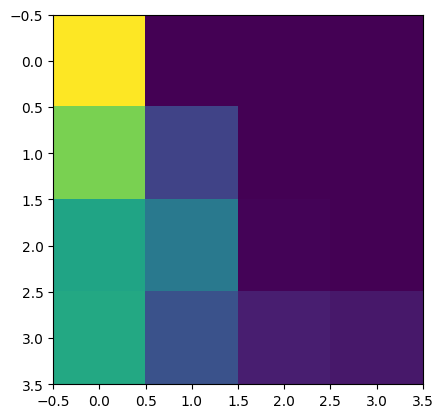

In [37]:
plt.imshow(atten_layer0_head_0.cpu().detach().numpy())

In [38]:
chunks = []

for token in tokens['input_ids'][0]:
  chunk = tokenizer.decode(token)
  chunks.append(tokenizer.decode(token))
  print(chunk)

Jonathan
 Din
u
 is


In [39]:
import numpy as np

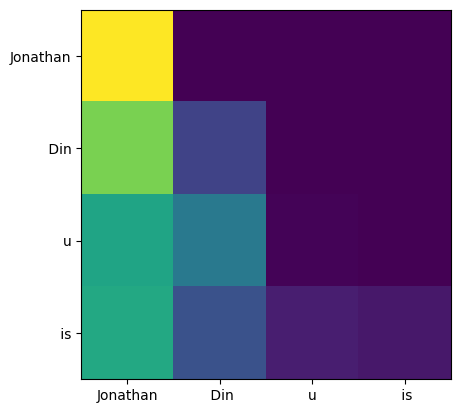

In [40]:
plt.xticks(np.arange(len(chunks)), labels=chunks)
plt.yticks(np.arange(len(chunks)), labels=chunks)
plt.imshow(atten_layer0_head_0.cpu().detach().numpy())

In [41]:
def attention_viz(text, model, tokenizer, layer=0, head=0):
  tokens = tokenizer(text, return_tensors='pt').to(device)
  output = model(**tokens, output_hidden_states=True, output_attentions=True)
  atten_matrix = output[-1][layer].squeeze(0)[head]

  chunks = [ tokenizer.decode(token) for token in tokens['input_ids'][0]]

  plt.xticks(np.arange(len(chunks)), labels=chunks)
  plt.yticks(np.arange(len(chunks)), labels=chunks)
  plt.imshow(atten_matrix.cpu().detach().numpy())

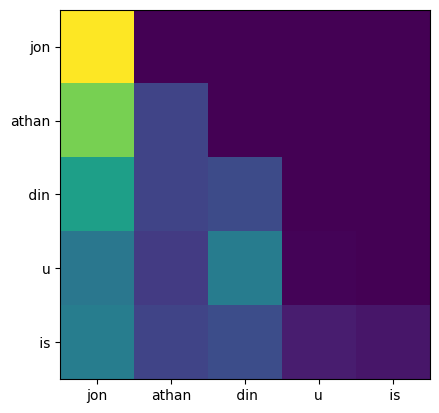

In [42]:
attention_viz("jonathan dinu is", model=model, tokenizer=tokenizer)

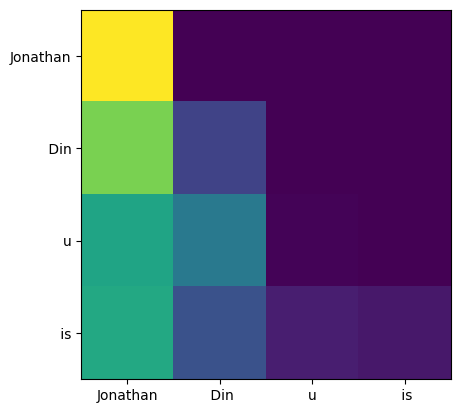

In [43]:
attention_viz("Jonathan Dinu is", model=model, tokenizer=tokenizer)

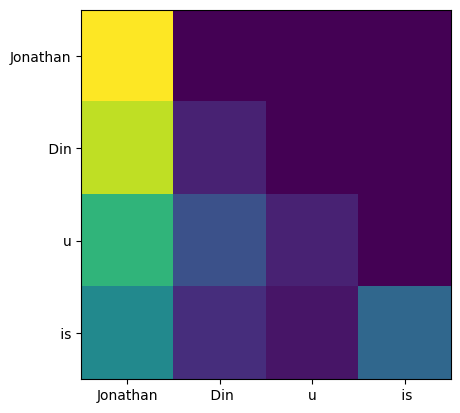

In [44]:
attention_viz("Jonathan Dinu is", model=model, tokenizer=tokenizer, layer=5)

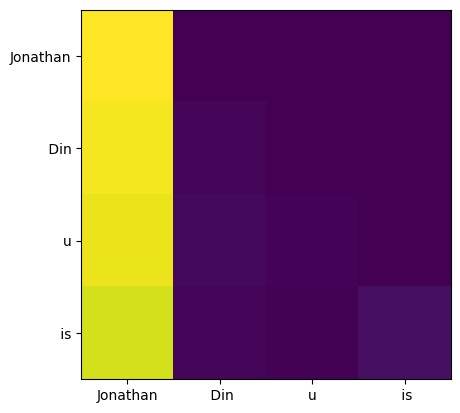

In [45]:
attention_viz("Jonathan Dinu is",  model=model, tokenizer=tokenizer, layer=5, head=11)

In [46]:
generator("The brown fox jumps over the", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "The brown fox jumps over the trees, the deer flies and many others.\n\n- It's a different story to what you see on video"},
 {'generated_text': 'The brown fox jumps over the railing of the waterfalls.'},
 {'generated_text': 'The brown fox jumps over the fence and gets his nose rubbed out from behind him so that the other Fox is not in the eye for the eye.'},
 {'generated_text': 'The brown fox jumps over the fence and has the dog\'s face covered," he said.'},
 {'generated_text': 'The brown fox jumps over the wall after hearing the sound of metal clapping from a nearby bar window.\n\n\n\n"I heard the noise'}]

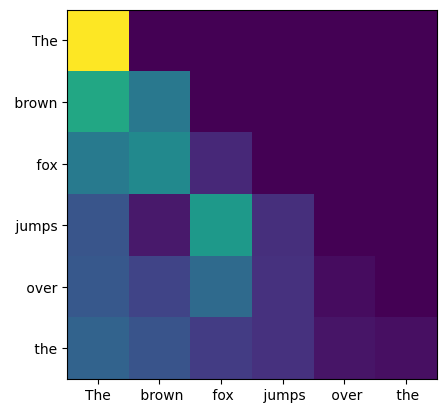

In [47]:
attention_viz("The brown fox jumps over the",  model=model, tokenizer=tokenizer)

https://huggingface.co/spaces/exbert-project/exbert

## 5.10 Embedding Sequences with Transformers

In [48]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "distilbert/distilgpt2"

model = AutoModelForCausalLM.from_pretrained(model_name).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [49]:
tokens = tokenizer("Jonathan Dinu is", return_tensors='pt').to(device)

In [50]:
tokens

{'input_ids': tensor([[30365, 23448,    84,   318]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1]], device='cuda:0')}

In [51]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [52]:
# Word Embedddings
model.transformer.wte

Embedding(50257, 768)

In [53]:
model.transformer.wte.weight

Parameter containing:
tensor([[-0.1445, -0.0455,  0.0042,  ..., -0.1523,  0.0184,  0.0991],
        [ 0.0573, -0.0722,  0.0234,  ...,  0.0603, -0.0042,  0.0478],
        [-0.1106,  0.0386,  0.1948,  ...,  0.0421, -0.1141, -0.1455],
        ...,
        [-0.0710, -0.0173,  0.0176,  ...,  0.0834,  0.1340, -0.0746],
        [ 0.1993,  0.0201,  0.0151,  ..., -0.0829,  0.0750, -0.0294],
        [ 0.0342,  0.0640,  0.0305,  ...,  0.0291,  0.0942,  0.0639]],
       device='cuda:0', requires_grad=True)

In [54]:
tokenizer("Jonathan")

{'input_ids': [30365], 'attention_mask': [1]}

In [55]:
model.transformer.wte(torch.tensor([30365]).to(device))

tensor([[-2.6748e-02,  1.6820e-02,  2.1875e-01, -1.7694e-01,  3.1509e-01,
         -2.4694e-02, -2.1765e-01,  3.4474e-02, -1.1454e-01, -3.7879e-03,
         -1.9932e-02,  2.1051e-01, -1.1500e-01,  8.1896e-02,  1.6310e-01,
         -6.9670e-02,  1.5470e-01,  7.1367e-02, -3.4150e-02,  1.2479e-01,
          5.3352e-02,  1.3532e-03, -7.2382e-02,  1.8683e-02, -7.0541e-02,
         -1.2263e-01,  1.6948e-02, -1.3524e-01,  4.4288e-02, -9.2416e-02,
          5.6978e-02, -2.2718e-02,  1.6759e-01,  2.9264e-01,  3.8494e-02,
          7.8528e-02, -3.2258e-01, -8.4816e-02,  2.5952e-01, -8.2193e-02,
          4.5737e-02,  1.0609e-01, -8.2990e-02, -1.8265e-01,  4.4240e-03,
          4.7533e-02, -7.0390e-02,  1.3702e-01,  1.9782e-01, -2.7560e-01,
         -1.5536e-01, -4.6668e-03,  2.4115e-03, -1.7784e-01, -1.8918e-02,
         -2.4926e-01, -2.0322e-03,  9.3299e-02, -9.8020e-02,  7.5027e-02,
         -1.4686e-01,  6.6280e-02, -3.8239e-02,  8.0545e-02,  3.3362e-01,
          7.8246e-02, -1.2117e-01, -1.

In [56]:
tokenizer.get_vocab()['Jonathan']

30365

In [57]:
# Sequence Embeddings
output = model(**tokens, use_cache=False)
output

CausalLMOutputWithCrossAttentions(loss=None, logits=tensor([[[-33.2398, -31.2526, -33.1846,  ..., -44.3461, -44.1899, -33.0008],
         [-54.1415, -54.0665, -55.9759,  ..., -63.6869, -58.1916, -52.7711],
         [-61.8251, -63.2909, -65.7875,  ..., -71.3735, -67.0476, -62.4894],
         [-66.7961, -67.9200, -69.7657,  ..., -74.2608, -71.3312, -68.1324]]],
       device='cuda:0', grad_fn=<UnsafeViewBackward0>), past_key_values=None, hidden_states=None, attentions=None, cross_attentions=None)

In [58]:
output.logits

tensor([[[-33.2398, -31.2526, -33.1846,  ..., -44.3461, -44.1899, -33.0008],
         [-54.1415, -54.0665, -55.9759,  ..., -63.6869, -58.1916, -52.7711],
         [-61.8251, -63.2909, -65.7875,  ..., -71.3735, -67.0476, -62.4894],
         [-66.7961, -67.9200, -69.7657,  ..., -74.2608, -71.3312, -68.1324]]],
       device='cuda:0', grad_fn=<UnsafeViewBackward0>)

In [59]:
output = model(**tokens, output_hidden_states=True)
output.hidden_states

(tensor([[[-0.0456, -0.1806,  0.2228,  ...,  0.0782,  0.0424,  0.0514],
          [ 0.0487, -0.0836,  0.0863,  ...,  0.1447, -0.0339,  0.0054],
          [ 0.0381, -0.0167,  0.1584,  ..., -0.1086, -0.0601,  0.2192],
          [-0.0009, -0.0663,  0.1362,  ...,  0.2010, -0.0030,  0.0147]]],
        device='cuda:0', grad_fn=<AddBackward0>),
 tensor([[[ 0.2507, -1.9464,  0.2776,  ..., -2.6878,  0.6244,  0.9243],
          [ 3.1643, -2.5601, -1.7726,  ..., -0.6267, -0.3975, -0.8502],
          [ 2.2119, -0.8133, -0.9146,  ..., -2.1375, -0.0392,  0.2948],
          [-0.9808, -1.0972, -0.0854,  ...,  0.9203, -0.1776,  0.8112]]],
        device='cuda:0', grad_fn=<AddBackward0>),
 tensor([[[ 0.1914, -2.0173,  0.8980,  ..., -2.2473,  0.9053,  0.7934],
          [ 3.2561, -2.9061, -2.8387,  ...,  0.0188, -1.0422, -0.6994],
          [ 2.4843, -1.1742, -0.6823,  ..., -1.2874,  0.0497,  0.8252],
          [-1.8139, -0.9893, -0.7275,  ...,  1.4264, -0.2658,  1.6624]]],
        device='cuda:0', grad_

In [60]:
output.hidden_states[-1].shape

torch.Size([1, 4, 768])

In [61]:
output.hidden_states[-1].squeeze(0)[-1]

tensor([-5.8763e-01, -1.3294e-01, -3.5036e-01, -2.3051e-01,  2.9621e-01,
         4.0314e-02, -9.9075e-01,  4.4454e-01, -9.2503e-02, -2.8864e-01,
         1.3947e-01,  3.1794e-01, -3.0956e-01,  2.2979e-01,  5.5089e-03,
         5.5454e-02, -2.5353e-01,  2.0844e-01,  1.4615e-01, -8.9818e-01,
         2.9840e-02, -1.3085e-01,  9.2355e-02, -6.0660e-02,  3.4357e-01,
        -5.4231e-01, -2.4680e-01, -3.0912e-01, -7.4618e-02, -1.6127e-01,
        -1.7434e-02,  2.3964e-01, -2.5673e-01,  2.0027e-01,  1.3080e-01,
         3.9628e-01,  4.3423e+01,  4.8113e-01,  3.1464e-01,  2.4102e-01,
        -3.0187e-01, -1.3487e-02,  2.8029e-01,  1.3945e-01,  7.4387e-02,
        -2.5003e-02,  1.1552e-01,  4.9745e-02,  1.4779e-01,  1.9573e-01,
        -2.5559e-01, -2.1666e-02, -9.3896e-02, -1.0179e-01,  2.6784e-01,
         1.7711e+00, -2.6653e-01, -1.4751e+00,  1.0949e-02, -7.9970e-02,
        -2.3868e-01,  3.9910e-01,  2.0981e-01,  2.6071e-02, -1.2216e+00,
         1.9382e-01,  3.6934e-02, -2.9456e-01, -2.2

## 5.11 Computing the Similarity Between Embeddings

In [62]:
def get_embedding(doc):
  tokens = tokenizer(doc, return_tensors='pt').to(device)
  output = model(**tokens, output_hidden_states=True)
  return output.hidden_states[-1].squeeze(0)[-1].cpu().detach().numpy()

In [63]:
jonathan_embed = get_embedding("Jonathan Dinu is a programmer who works with generative AI")

In [64]:
bread_embed = get_embedding("Food can be both nutritious and tasty")

In [65]:
jonathan_embed2 = get_embedding("Coding machine learning models can be difficult for Jonathan.")

In [66]:
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [67]:
cdist = distance.cosine(jonathan_embed, bread_embed)

In [68]:
csim = 1 - cdist

In [69]:
csim

0.9731456704142086

In [70]:
cdist

0.02685432958579137

In [71]:
1 - distance.cosine(jonathan_embed, jonathan_embed2)

0.980396711000267

In [72]:
1 - distance.cosine(bread_embed, jonathan_embed2)

0.9725874251840851

## 5.12 Semantic Search with Embeddings

In [73]:
documents = [
    # query
    "Thermodynamics is a branch of physics that deals with heat, work, and temperature, and their relation to energy, entropy, and the physical properties of matter and radiation.",
    # "corpus"
    "The cryptic forest falcon is a rarely spotted bird of prey often confused for its congeners, the barred forest falcon, the lined forest falcon, and the plumbeous forest falcon.",
    "Jonathan went to the store yesterday to get some milk.",
    "Bonnaya antipoda is a herbaceous perennial plant belonging to Linderniaceae family. It is native to tropical and sub-tropical Asia and Australia.",
    "The softmax function converts a vector of K real numbers into a probability distribution of K possible outcomes.",
    "The rabbit-hole went straight on like a tunnel for some way, and then dipped suddenly down, so suddenly that Alice had not a moment to think about stopping herself before she found herself falling down a very deep well.",
    "The brown fox jumped over the red fence.",
    "HOME is the twelfth studio album by Mr. Children. Its first press limited edition includes a documentary DVD on the making of the album and live performances by members of the group between recording sessions.",
    "Tell me, O Muse, of that ingenious hero who travelled far and wide after he had sacked the famous town of Troy.",
    "When the sun shines brightly, Lisa goes to the beach to swim in the ocean.",
    "Ants are eusocial insects of the family Formicidae and, along with the related wasps and bees, belong to the order Hymenoptera.",
    "Statistical mechanics is a mathematical framework that applies statistical methods and probability theory to large assemblies of microscopic entities.",
    "A self-addressed stamped envelope is an envelope with the sender's name and address on it, plus affixed paid postage, that is mailed to a company or private individual.",
    "Alan Wooler was an English footballer who played as a defender in England for Weymouth, Reading, West Ham United, Aldershot, Leatherhead and Farnborough Town.",
    "A database abstraction layer is an application programming interface which unifies the communication between a computer application and databases such as SQL Server, IBM Db2, MySQL, PostgreSQL, Oracle or SQLite.",
]

In [74]:
import numpy as np

In [75]:
embeddings = np.array([ get_embedding(doc) for doc in documents])

In [76]:
embeddings.shape

(15, 768)

In [77]:
dist = distance.squareform(distance.pdist(embeddings, 'cosine'))

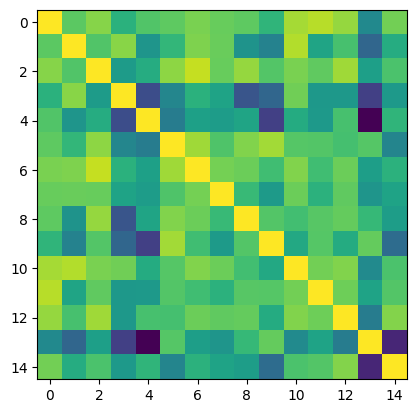

In [78]:
plt.imshow(1 - dist)

In [79]:
print(documents[4])
print(documents[13])

The softmax function converts a vector of K real numbers into a probability distribution of K possible outcomes.
Alan Wooler was an English footballer who played as a defender in England for Weymouth, Reading, West Ham United, Aldershot, Leatherhead and Farnborough Town.


In [80]:
print(documents[0])
print(documents[11])

Thermodynamics is a branch of physics that deals with heat, work, and temperature, and their relation to energy, entropy, and the physical properties of matter and radiation.
Statistical mechanics is a mathematical framework that applies statistical methods and probability theory to large assemblies of microscopic entities.


## 5.13 Contrastive Embeddings with Sentence Transformers

In [81]:
from sentence_transformers import SentenceTransformer

embed_model = SentenceTransformer("all-MiniLM-L6-v2")

In [82]:
embeddings = embed_model.encode(documents)
embeddings.shape

(15, 384)

In [83]:
similarities = embed_model.similarity(embeddings, embeddings)

In [84]:
similarities.shape

torch.Size([15, 15])

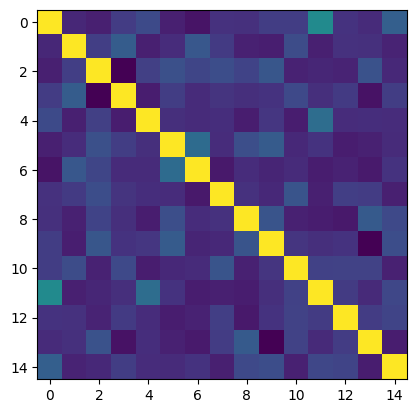

In [85]:
plt.imshow(similarities)

In [86]:
print(documents[0])
print(documents[4])
print(documents[11])
print(documents[14])

Thermodynamics is a branch of physics that deals with heat, work, and temperature, and their relation to energy, entropy, and the physical properties of matter and radiation.
The softmax function converts a vector of K real numbers into a probability distribution of K possible outcomes.
Statistical mechanics is a mathematical framework that applies statistical methods and probability theory to large assemblies of microscopic entities.
A database abstraction layer is an application programming interface which unifies the communication between a computer application and databases such as SQL Server, IBM Db2, MySQL, PostgreSQL, Oracle or SQLite.


In [87]:
print(documents[2])

Jonathan went to the store yesterday to get some milk.


## Appendix

In [88]:
# version of Python of the current Jupyter kernel
import sys, datetime

print(f"Current notebook Python version: {sys.version}")
print(f"Notebook last executed: {datetime.datetime.now()}")

Current notebook Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Notebook last executed: 2024-12-15 20:43:52.220895


In [89]:
# package versions when this notebook was last run in Colab (and committed)
!pip freeze

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.10
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2024.12.9.0.36.21
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.27.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1